In [ ]:
# Import necessary libraries
import json
import pandas as pd
import numpy as np

# For visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For Colab files
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
business_filepath = "/content/drive/My Drive/Colab Notebooks/yelp-dataset/yelp_academic_dataset_business.json"
review_filepath = "/content/drive/My Drive/Colab Notebooks/yelp-dataset/yelp_academic_dataset_review.json"
user_filepath = "/content/drive/My Drive/Colab Notebooks/yelp-dataset/yelp_academic_dataset_user.json"

### Prepare Restaurant Data

In [ ]:
# Generator function for businesses
def load_businesses(file_path):
    with open(file_path, 'r') as data_file:
        for line in data_file:
            business_info = json.loads(line)
            yield business_info

business_raw = pd.DataFrame(load_businesses(business_filepath))

In [ ]:
# Preview business data
business_raw.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
PA_mask = business_raw['state'] == 'PA'
restaurants_mask = business_raw['categories'].notna() & business_raw['categories'].str.contains('Restaurants')

In [ ]:
restaurants = business_raw[PA_mask & restaurants_mask]
restaurants.reset_index(drop=True, inplace=True)
restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [ ]:
restaurants.shape

(12641, 14)

In [ ]:
restaurants.isna().sum()

,0
business_id,0
name,0
address,0
city,0
state,0
postal_code,0
latitude,0
longitude,0
stars,0
review_count,0


In [ ]:
# Standardize city names
restaurants.loc[:, 'city'] = restaurants['city'].apply(lambda city: city.strip())
restaurants.loc[:, 'city'] = restaurants['city'].apply(lambda city: city.title())

In [ ]:
# Confirm addresses of restaurants with unspecified city names
restaurants[restaurants['city'] == 'Pennsylvania']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
7245,2SDa9Vc7opPT1WicNIkVXw,Texas Chicken & Burgers,"3960-80 Kensington Ave, Philadelphia",Pennsylvania,PA,19124,40.006140,-75.096110,2.0,5,1,"{'Alcohol': ''none'', 'HasTV': 'True', 'Ambien...","Restaurants, Burgers, American (Traditional), ...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
11116,DcLUToAT66NboaJPrH9jCg,Lucky 7 Deli & Fried Chicken,255 Horsham Rd,Pennsylvania,PA,19044,40.144801,-75.122405,4.0,23,0,"{'RestaurantsDelivery': 'False', 'HasTV': 'Fal...","Restaurants, Delis, Sandwiches","{'Monday': '5:0-23:0', 'Tuesday': '5:0-23:0', ..."


In [ ]:
def correct_city_names(name):
    match name:
        case 'Abington':
            return 'Abington Township'
        case 'Bensalem' | 'Bensalem. Pa':
            return 'Bensalem Township'
        case 'Bethel':
            return 'Bethel Township'
        case 'Bristol' | 'Bristol Twp':
            return 'Bristol Township'
        case 'Charlotte':
            return 'Philadelphia'
        case 'Cheltenham':
            return 'Cheltenham Township'
        case 'Conshohoeken':
            return 'Conshohocken'
        case 'E. Norristown':
            return 'Norristown'
        case 'Festerville':
            return 'Feasterville'
        case 'Feasterville Trevose':
            return 'Feasterville-Trevose'
        case 'Fox Street' | 'Pennsylvania' | 'Phila' | 'Philadephia' | 'Philly' | 'Southwest Philadelphia':
            return 'Philadelphia'
        case 'Glenoldan':
            return 'Glenolden'
        case 'N.Wales':
            return 'North Wales'
        case 'Newtown' | 'Newtown Sqaure' | 'Newtown Square':
            return 'Newtown Township'
        case 'St. Davids':
            return 'Saint Davids'
        case 'W.Chester' | 'West Chester Pa':
            return 'West Chester'
        case 'Warrington':
            return 'Warrington Township'
        case _:
            return name

In [ ]:
restaurants.loc[:, 'city'] = restaurants['city'].apply(correct_city_names)
restaurants.loc[11116, 'city'] = 'Hatboro'

In [ ]:
def categories_to_list(categories):
    if categories is None:
        return []
    items = categories.split(", ")
    cat_list = [i for i in items]
    return cat_list

In [ ]:
restaurants.loc[:, 'categories'] = restaurants['categories'].apply(categories_to_list)

In [ ]:
restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","[Restaurants, Food, Bubble Tea, Coffee & Tea, ...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","[Sushi Bars, Restaurants, Japanese]","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","[Korean, Restaurants]","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","[Cocktail Bars, Bars, Italian, Nightlife, Rest...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","[Pizza, Restaurants, Salad, Soup]","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


Cleaning up `hours` column:

In [ ]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
              'Friday', 'Saturday', 'Sunday']

def generate_hours(hours_dict):
  no_hours = [0 for i in range(24)]
  weekly_hours = {day: no_hours.copy() for day in weekdays}

  if hours_dict is None:
    return weekly_hours

  for i in range(len(weekdays)):
    day = weekdays[i]
    if day in hours_dict.keys():
      open_time, close_time = hours_dict[day].split('-')
      open_hour = int(open_time.split(':')[0])
      close_hour = int(close_time.split(':')[0])

      if open_hour < close_hour:
        for j in range(open_hour, close_hour):
          weekly_hours[day][j] = 1
      elif open_hour >= close_hour:
        next_day = weekdays[i+1] if i < len(weekdays) - 1 else weekdays[0]
        for j in range(open_hour, 24):
          weekly_hours[day][j] = 1
        for j in range(0, close_hour):
          weekly_hours[next_day][j] = 1

  return weekly_hours

In [ ]:
restaurant_hours = {day: [] for day in weekdays}

for hours_dict in restaurants['hours']:
  weekly_hours = generate_hours(hours_dict)
  for day in weekdays:
    restaurant_hours[day].append(weekly_hours[day])

In [ ]:
restaurant_hours_df = pd.DataFrame(restaurant_hours)
rename_hours = {day: day + '_hours' for day in weekdays}
restaurant_hours_df.rename(columns=rename_hours, inplace=True)
restaurant_hours_df.head()

,Monday_hours,Tuesday_hours,Wednesday_hours,Thursday_hours,Friday_hours,Saturday_hours,Sunday_hours
0,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
restaurants = pd.concat([restaurants, restaurant_hours_df], axis=1)

In [ ]:
# Drop old hours column and display new dataframe
restaurants.drop(columns=['is_open', 'hours'], inplace=True)
restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,Monday_hours,Tuesday_hours,Wednesday_hours,Thursday_hours,Friday_hours,Saturday_hours,Sunday_hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","[Restaurants, Food, Bubble Tea, Coffee & Tea, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,"{'RestaurantsReservations': 'True', 'Restauran...","[Sushi Bars, Restaurants, Japanese]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","[Korean, Restaurants]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","[Cocktail Bars, Bars, Italian, Nightlife, Rest...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,"{'RestaurantsReservations': 'False', 'Caters':...","[Pizza, Restaurants, Salad, Soup]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#### Generating Attribute Features

In [ ]:
restaurant_attributes = set()

for attr_dict in restaurants['attributes']:
    if attr_dict is not None:
        restaurant_attributes.update(attr_dict.keys())

restaurant_attributes = sorted(list(restaurant_attributes))
restaurant_attributes

['AcceptsInsurance',
 'AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'Open24Hours',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsCounterService',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi']

In [ ]:
attributes_list = []

for attr_dict in restaurants['attributes']:
  full_attr_dict = {attr: np.nan for attr in restaurant_attributes}
  if attr_dict is not None:
    for key, val in attr_dict.items():
      full_attr_dict[key] = val
  attributes_list.append(full_attr_dict)

In [ ]:
attributes_df = pd.DataFrame(attributes_list)
attributes_df.head()

,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,...,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi
0,NaN,NaN,u'none',NaN,NaN,NaN,NaN,True,NaN,False,...,NaN,False,NaN,1,NaN,NaN,True,NaN,NaN,u'free'
1,NaN,NaN,'full_bar',"{'touristy': False, 'hipster': False, 'romanti...",NaN,NaN,NaN,NaN,NaN,True,...,NaN,True,True,2,True,True,True,NaN,True,'free'
2,NaN,NaN,u'none',"{'touristy': False, 'hipster': False, 'romanti...",NaN,NaN,NaN,True,NaN,True,...,NaN,None,False,1,False,True,True,NaN,NaN,u'no'
3,NaN,NaN,u'full_bar',"{'touristy': False, 'hipster': True, 'romantic...",NaN,NaN,NaN,True,NaN,True,...,NaN,True,True,2,False,True,True,u'no',NaN,u'free'
4,NaN,NaN,u'none',"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,True,...,NaN,True,True,1,False,True,True,NaN,NaN,'no'


In [ ]:
attributes_df.columns

Index(['AcceptsInsurance', 'AgesAllowed', 'Alcohol', 'Ambience', 'BYOB',
       'BYOBCorkage', 'BestNights', 'BikeParking', 'BusinessAcceptsBitcoin',
       'BusinessAcceptsCreditCards', 'BusinessParking', 'ByAppointmentOnly',
       'Caters', 'CoatCheck', 'Corkage', 'DietaryRestrictions', 'DogsAllowed',
       'DriveThru', 'GoodForDancing', 'GoodForKids', 'GoodForMeal',
       'HappyHour', 'HasTV', 'Music', 'NoiseLevel', 'Open24Hours',
       'OutdoorSeating', 'RestaurantsAttire', 'RestaurantsCounterService',
       'RestaurantsDelivery', 'RestaurantsGoodForGroups',
       'RestaurantsPriceRange2', 'RestaurantsReservations',
       'RestaurantsTableService', 'RestaurantsTakeOut', 'Smoking',
       'WheelchairAccessible', 'WiFi'],
      dtype='object')

In [ ]:
attributes_summary = attributes_df.isna().sum() / attributes_df.shape[0]

unique_attr_vals = {'unique_values': [attributes_df[col].unique()
                                      for col in attributes_df.columns]}
unique_attr_vals_df = pd.DataFrame(unique_attr_vals)
unique_attr_vals_df.index = attributes_df.columns

attributes_summary = pd.concat([attributes_summary, unique_attr_vals_df], axis=1)
attributes_summary = attributes_summary.rename(columns={0: "nan_pct"})
attributes_summary

,nan_pct,unique_values
AcceptsInsurance,0.999763,"[nan, False]"
AgesAllowed,0.997627,"[nan, u'allages', u'21plus']"
Alcohol,0.218970,"[u'none', 'full_bar', u'full_bar', nan, 'none'..."
Ambience,0.213116,"[nan, {'touristy': False, 'hipster': False, 'r..."
BYOB,0.925243,"[nan, False, True, None]"
BYOBCorkage,0.943359,"[nan, 'yes_free', 'no', u'yes_free', u'yes_cor..."
BestNights,0.924452,"[nan, {'monday': False, 'tuesday': False, 'fri..."
BikeParking,0.336920,"[True, nan, False, None]"
BusinessAcceptsBitcoin,0.868523,"[nan, False, True, None]"
BusinessAcceptsCreditCards,0.089866,"[False, True, nan, None]"


Cleaning up strings:

In [ ]:
from ast import literal_eval

def clean_string(s):
  if (isinstance(s, str)):
    str_val = literal_eval(s)
    if str_val is None:
      return np.nan
    else:
      return str_val
  else:
    return s

for c in attributes_df.columns:
  attributes_df[c] = attributes_df[c].apply(clean_string)

Examining distributions of attributes:

In [ ]:
for c in attributes_df.columns:
  print(pd.concat([
          attributes_df[c].value_counts(dropna=False),
          attributes_df[c].value_counts(normalize=True, dropna=False)
          ], axis=1))
  print()

                  count  proportion
AcceptsInsurance                   
NaN               12638    0.999763
False                 3    0.000237

             count  proportion
AgesAllowed                   
NaN          12611    0.997627
allages         26    0.002057
21plus           4    0.000316

               count  proportion
Alcohol                         
none            6653    0.526303
full_bar        2792    0.220869
NaN             2776    0.219603
beer_and_wine    420    0.033225

                                                    count  proportion
Ambience                                                             
{'romantic': False, 'intimate': False, 'classy'...   3597    0.284550
NaN                                                  2786    0.220394
{'romantic': False, 'intimate': False, 'classy'...   2489    0.196899
{'touristy': False, 'hipster': False, 'romantic...    594    0.046990
{'touristy': False, 'hipster': False, 'romantic...    472    0.037339
...       

We remove the following attributes with high null percentages / low True percentages:
- `AcceptsInsurance`
- `AgesAllowed`
- `BestNights`
- `BusinessAcceptsBitcoin`
- `ByAppointmentOnly`
- `DietaryRestrictions`
- `GoodForDancing`
- `Open24Hours`
- `RestaurantsCounterService`

In [ ]:
drop_attributes = [
  'AcceptsInsurance', 'AgesAllowed', 'BestNights', 'BusinessAcceptsBitcoin',
  'ByAppointmentOnly', 'DietaryRestrictions', 'GoodForDancing', 'Open24Hours',
  'RestaurantsCounterService',
]

attributes_df.drop(columns=drop_attributes, inplace=True)

In [ ]:
# Binarizing categorical columns

attributes_df['Alcohol'] = attributes_df['Alcohol'] \
  .apply(lambda x: True if x in ['full_bar', 'beer_and_wine']
         else False)

attributes_df['Smoking'] = attributes_df['Smoking'] \
  .apply(lambda x: True if x in ['yes', 'outdoor']
         else False)

attributes_df['WiFi'] = attributes_df['WiFi'] \
  .apply(lambda x: True if x in ['free', 'paid']
         else False)

In [ ]:
# Extracting true values from true-false dicts

def get_true_values_from_dict(d):
  if isinstance(d, dict):
    return sorted([k for k, v in d.items() if v])
  else:
    return []

dict_attributes = ['Ambience', 'BusinessParking', 'GoodForMeal', 'Music']

for attr in dict_attributes:
  attributes_df[attr] = attributes_df[attr].apply(get_true_values_from_dict)

In [ ]:
# Use BYOBCorkage to impute values in BYOB and Corkage

for idx, row in attributes_df.iterrows():
  byob = None if pd.isna(row['BYOB']) else row['BYOB']
  byob_corkage = None if pd.isna(row['BYOBCorkage']) else row['BYOBCorkage']
  corkage = None if pd.isna(row['Corkage']) else row['Corkage']

  if byob is None or corkage is None:
    match byob_corkage:
      case 'no':
        if byob is None:
          attributes_df.loc[idx, 'BYOB'] = False
        if corkage is None:
          attributes_df.loc[idx, 'Corkage'] = False
      case 'yes_free':
        if byob is None:
          attributes_df.loc[idx, 'BYOB'] = True
        if corkage is None:
          attributes_df.loc[idx, 'Corkage'] = False
      case 'yes_corkage':
        if byob is None:
          attributes_df.loc[idx, 'BYOB'] = True
        if corkage is None:
          attributes_df.loc[idx, 'Corkage'] = True

attributes_df.drop(columns=['BYOBCorkage'], inplace=True)

In [ ]:
# We address BYOB, BYOBCorkage, and Corkage separately
binary_attributes = [
  'BikeParking', 'BusinessAcceptsCreditCards', 'Caters', 'CoatCheck',
  'DogsAllowed', 'DriveThru', 'GoodForKids', 'HappyHour', 'HasTV',
  'OutdoorSeating', 'RestaurantsDelivery', 'RestaurantsGoodForGroups',
  'RestaurantsReservations', 'RestaurantsTableService', 'RestaurantsTakeOut',
  'WheelchairAccessible', 'BYOB', 'Corkage'
]

for attr in binary_attributes:
  attributes_df[attr] = attributes_df[attr].apply(lambda x: True
                                                  if x == True else False)

In [ ]:
ordinal_attributes = ['NoiseLevel', 'RestaurantsAttire', 'RestaurantsPriceRange2']

for attr in ordinal_attributes:
  fill_val = 0.0 if attr == 'RestaurantsPriceRange2' else 'unknown'
  attributes_df[attr] = attributes_df[attr].apply(lambda x: fill_val
                                                  if pd.isna(x) else x)

In [ ]:
attributes_df.head(10)

,Alcohol,Ambience,BYOB,BikeParking,BusinessAcceptsCreditCards,BusinessParking,Caters,CoatCheck,Corkage,DogsAllowed,...,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi
0,False,[],False,True,False,[street],True,False,False,False,...,unknown,False,False,1.0,False,False,True,False,False,True
1,True,[classy],False,False,True,[street],False,False,False,False,...,casual,True,True,2.0,True,True,True,False,True,True
2,False,[casual],False,True,True,[street],True,False,False,False,...,casual,False,False,1.0,False,True,True,False,False,False
3,True,"[casual, hipster]",False,True,True,[street],False,False,False,False,...,casual,True,True,2.0,False,True,True,False,False,True
4,False,[],False,True,True,[],False,False,False,False,...,casual,True,True,1.0,False,True,True,False,False,False
5,False,[casual],False,True,True,"[lot, street]",True,False,False,False,...,casual,True,True,1.0,False,False,True,False,False,False
6,False,[classy],False,False,True,[lot],False,False,False,True,...,unknown,True,False,2.0,False,False,True,False,False,False
7,True,[],False,False,True,[lot],False,False,False,False,...,casual,False,True,2.0,False,False,True,False,False,True
8,False,[],False,False,False,[lot],False,False,False,False,...,unknown,False,False,0.0,False,False,False,False,False,False
9,True,[casual],False,True,True,[street],False,False,False,False,...,casual,False,True,2.0,True,False,True,False,False,False


In [ ]:
attributes_df.columns

Index(['Alcohol', 'Ambience', 'BYOB', 'BikeParking',
       'BusinessAcceptsCreditCards', 'BusinessParking', 'Caters', 'CoatCheck',
       'Corkage', 'DogsAllowed', 'DriveThru', 'GoodForKids', 'GoodForMeal',
       'HappyHour', 'HasTV', 'Music', 'NoiseLevel', 'OutdoorSeating',
       'RestaurantsAttire', 'RestaurantsDelivery', 'RestaurantsGoodForGroups',
       'RestaurantsPriceRange2', 'RestaurantsReservations',
       'RestaurantsTableService', 'RestaurantsTakeOut', 'Smoking',
       'WheelchairAccessible', 'WiFi'],
      dtype='object')

In [ ]:
# Renaming attribute columns
rename_attributes_dict = {
  'BusinessAcceptsCreditCards': 'AcceptsCC',
  'BusinessParking': 'CarParking',
  'RestaurantsAttire': 'Attire',
  'RestaurantsDelivery': 'Delivery',
  'RestaurantsGoodForGroups': 'GoodForGroups',
  'RestaurantsPriceRange2': 'PriceRange',
  'RestaurantsReservations': 'Reservations',
  'RestaurantsTableService': 'TableService',
  'RestaurantsTakeOut': 'TakeOut',
}

attributes_df.rename(columns=rename_attributes_dict, inplace=True)

In [ ]:
restaurants = pd.concat([restaurants, attributes_df], axis=1)
restaurants.drop(columns=['attributes'], inplace=True)

In [ ]:
restaurants.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Attire,Delivery,GoodForGroups,PriceRange,Reservations,TableService,TakeOut,Smoking,WheelchairAccessible,WiFi
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,unknown,False,False,1.0,False,False,True,False,False,True
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,casual,True,True,2.0,True,True,True,False,True,True
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,...,casual,False,False,1.0,False,True,True,False,False,False
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,...,casual,True,True,2.0,False,True,True,False,False,True
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,...,casual,True,True,1.0,False,True,True,False,False,False
5,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,10 Rittenhouse Pl,Ardmore,PA,19003,40.006707,-75.289671,3.5,109,...,casual,True,True,1.0,False,False,True,False,False,False
6,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,...,unknown,True,False,2.0,False,False,True,False,False,False
7,2xVsWBNFwZOxIOdd9Mwnww,Cheeseburger In Paradise,116 N Pottstown Pike,Exton,PA,19341,40.029962,-75.630607,2.5,20,...,casual,False,True,2.0,False,False,True,False,False,True
8,ABxoFuzZy5mqQ8C5FJJajQ,Core de Roma,201 Jefferson St,Bala Cynwyd,PA,19004,40.028357,-75.238084,5.0,12,...,unknown,False,False,0.0,False,False,False,False,False,False
9,qfWJmJ0g96eM_fWma3ja0g,Doc Magrogan's Oyster House - West Chester,117 E Gay St,West Chester,PA,19380,39.961542,-75.603604,3.0,114,...,casual,False,True,2.0,True,False,True,False,False,False


In [ ]:
restaurants.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'categories',
       'Monday_hours', 'Tuesday_hours', 'Wednesday_hours', 'Thursday_hours',
       'Friday_hours', 'Saturday_hours', 'Sunday_hours', 'Alcohol', 'Ambience',
       'BYOB', 'BikeParking', 'AcceptsCC', 'CarParking', 'Caters', 'CoatCheck',
       'Corkage', 'DogsAllowed', 'DriveThru', 'GoodForKids', 'GoodForMeal',
       'HappyHour', 'HasTV', 'Music', 'NoiseLevel', 'OutdoorSeating', 'Attire',
       'Delivery', 'GoodForGroups', 'PriceRange', 'Reservations',
       'TableService', 'TakeOut', 'Smoking', 'WheelchairAccessible', 'WiFi'],
      dtype='object')

In [ ]:
restaurants.shape

(12641, 46)

In [ ]:
restaurants.describe()

,latitude,longitude,stars,review_count,PriceRange
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,40.040374,-75.231329,3.521557,83.925797,1.390080
std,0.121069,0.182647,0.796247,175.751601,0.805318
min,39.795125,-75.798695,1.000000,5.000000,0.000000
25%,39.950102,-75.317770,3.000000,14.000000,1.000000
50%,40.006335,-75.175753,3.500000,34.000000,1.000000
75%,40.120194,-75.143226,4.000000,86.000000,2.000000
max,40.449748,-74.772131,5.000000,5721.000000,4.000000


In [ ]:
# Maintain set of restaurant business_ids to prune reviews
restaurant_ids = set(restaurants['business_id'])

### Exploring Restaurant Data

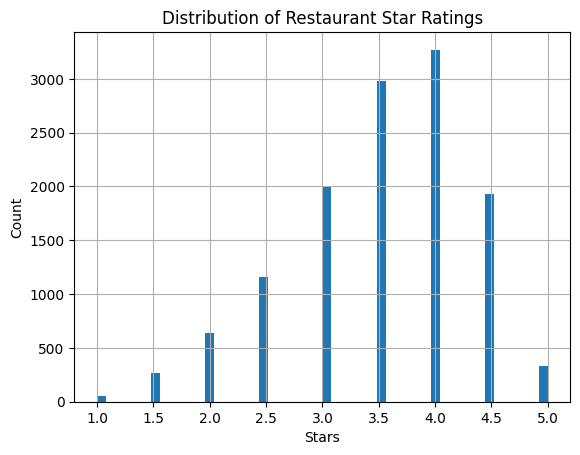

In [ ]:
restaurants['stars'].hist(bins=50)
plt.xlabel("Stars")
plt.ylabel("Count")
plt.title("Distribution of Restaurant Star Ratings")
plt.show()

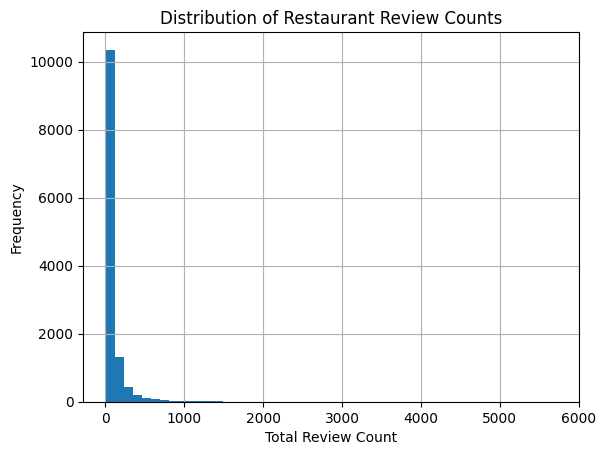

In [ ]:
restaurants['review_count'].hist(bins=50)
plt.xlabel("Total Review Count")
plt.ylabel("Frequency")
plt.title("Distribution of Restaurant Review Counts")
plt.show()

In [ ]:
from collections import Counter

category_counts = Counter()

_ = restaurants['categories'].apply(lambda x: category_counts.update(x))

In [ ]:
# Get list of (value, count) pairs
top_categories = category_counts.most_common()

# Remove non-descriptive categories
top_20_categories = [cat for cat in top_categories if cat[0] not in ['Restaurants', 'Food']]
top_20_categories = top_20_categories[:20]

top_20_categories

[('Sandwiches', 2151),
 ('Pizza', 2128),
 ('Nightlife', 1936),
 ('Bars', 1854),
 ('American (Traditional)', 1779),
 ('American (New)', 1539),
 ('Italian', 1433),
 ('Breakfast & Brunch', 1425),
 ('Coffee & Tea', 1124),
 ('Burgers', 983),
 ('Chinese', 918),
 ('Fast Food', 915),
 ('Event Planning & Services', 795),
 ('Seafood', 767),
 ('Mexican', 714),
 ('Delis', 708),
 ('Salad', 678),
 ('Cafes', 653),
 ('Caterers', 530),
 ('Bakeries', 518)]

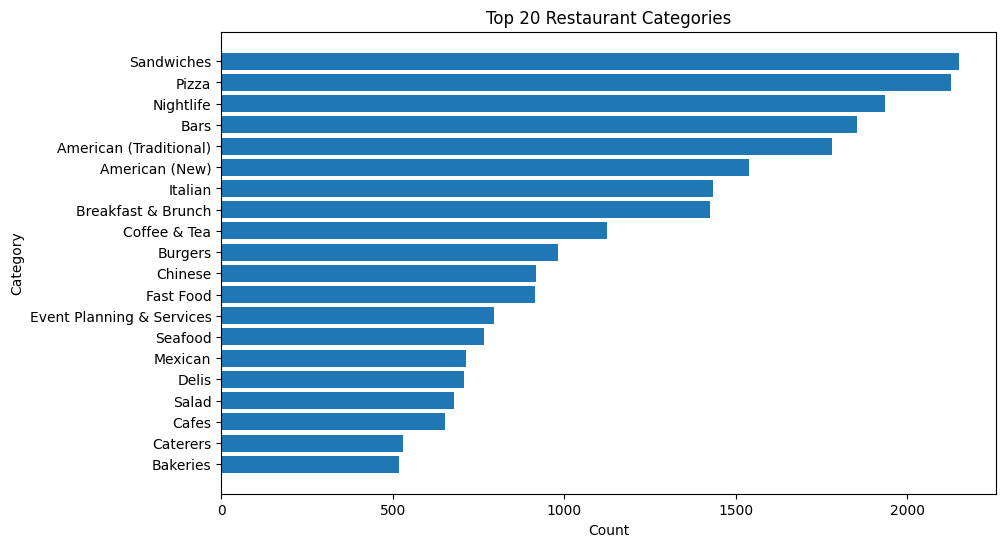

In [ ]:
cat_bar_x = [x[1] for x in top_20_categories[::-1]]
cat_bar_y = [x[0] for x in top_20_categories[::-1]]

plt.figure(figsize=(10, 6))
plt.barh(cat_bar_y, cat_bar_x)
plt.ylabel("Category")
plt.xlabel("Count")
plt.title("Top 20 Restaurant Categories")
plt.show()

In [ ]:
top_20_categories_ratings = {cat: [] for cat, total in top_20_categories}

for cat, total in top_20_categories:
  cat_restaurants = restaurants[restaurants['categories'].apply(lambda x: cat in x)]
  top_20_categories_ratings[cat].append(cat_restaurants['stars'].mean())
  top_20_categories_ratings[cat].append(cat_restaurants.shape[0])

top_20_categories_df = pd.DataFrame(top_20_categories_ratings, index=['Average Rating', 'Count']).T
top_20_categories_df.sort_values(by='Average Rating', ascending=False)

,Average Rating,Count
Cafes,3.904288,653.0
Bakeries,3.768340,518.0
Delis,3.711158,708.0
Caterers,3.693396,530.0
Breakfast & Brunch,3.676491,1425.0
Event Planning & Services,3.622013,795.0
Salad,3.614307,678.0
Seafood,3.584746,767.0
American (New),3.568876,1539.0
Mexican,3.556723,714.0


Looking at distribution of restaurant hours:

In [ ]:
restaurant_hours_hist = {day: np.array([0 for i in range(24)]) for day in weekdays}

for i in range(restaurants.shape[0]):
  for day, hours_col in rename_hours.items():
    restaurant_hours_hist[day] += np.array(restaurants.loc[i, hours_col])

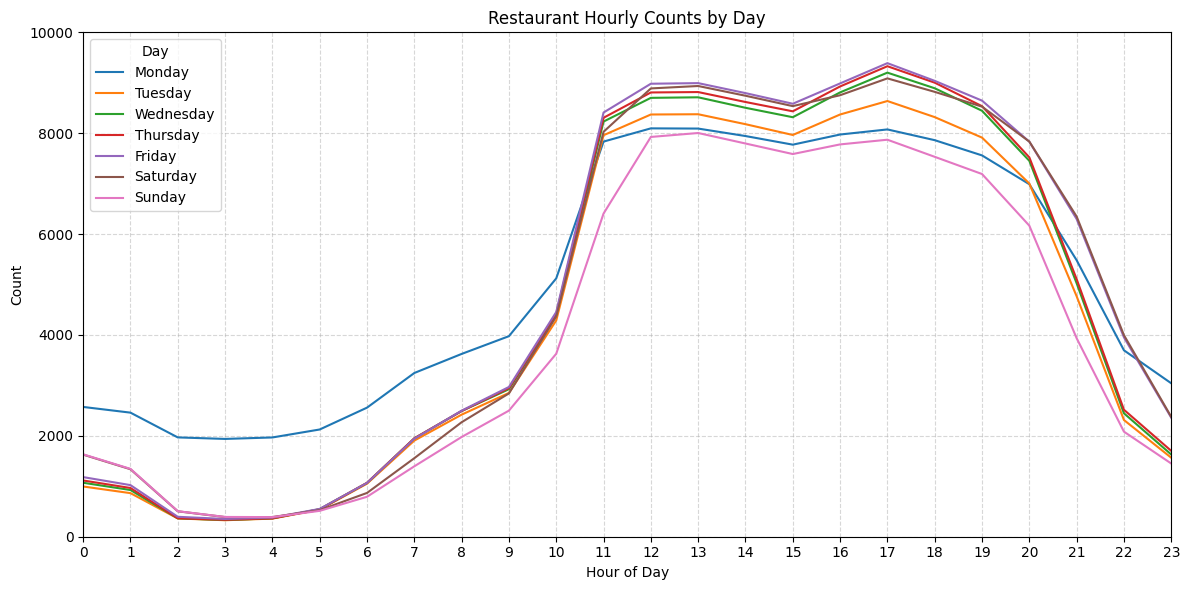

In [ ]:
# X-axis for all plots (hours of the day)
hours = np.arange(24)

# Create a single figure and axis
plt.figure(figsize=(12, 6))

# Plot each day's data on the same axis
for day, counts in restaurant_hours_hist.items():
  plt.plot(hours, counts, label=day)

# Customize the plot
plt.title("Restaurant Hourly Counts by Day")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.xticks(hours)
plt.xlim(0, 23)
plt.ylim(0, 10_000)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Day")

# Show the plot
plt.tight_layout()
plt.show()

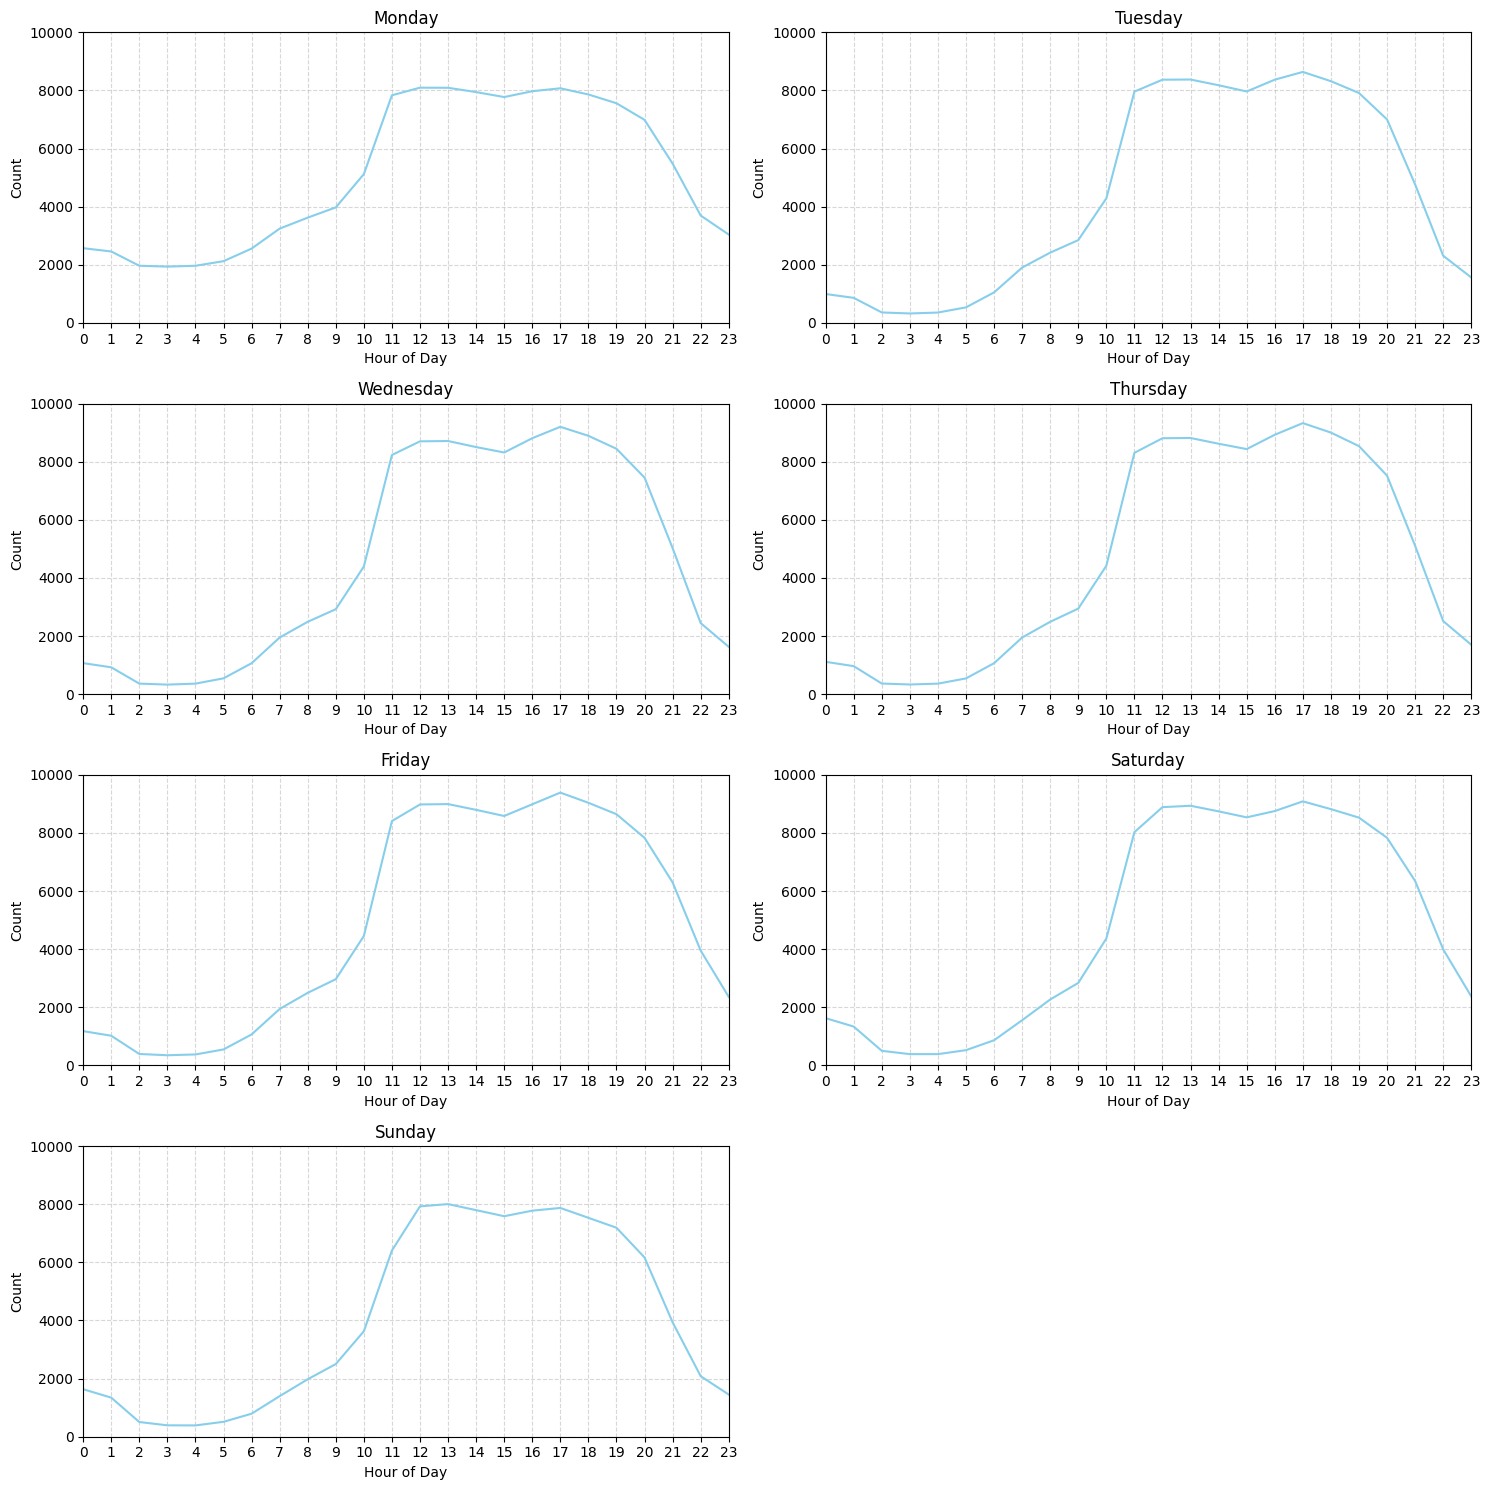

In [ ]:
# Set up subplots: 7 days = 7 plots
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()  # Flatten 2D array of axes for easier iteration

# X-axis for all histograms (hours of the day)
hours = np.arange(24)

# Plot each day's data
for idx, (day, counts) in enumerate(restaurant_hours_hist.items()):
  ax = axes[idx]
  ax.plot(hours, counts, color='skyblue')
  ax.set_title(day)
  ax.set_xticks(hours)
  ax.set_xlim(0, 23)
  ax.set_ylim(0, 10_000)
  ax.set_xlabel("Hour of Day")
  ax.set_ylabel("Count")
  ax.grid(True, linestyle='--', alpha=0.5)

# Hide the extra subplot (8th)
if len(restaurant_hours_hist) < len(axes):
  for i in range(len(restaurant_hours_hist), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
# Updating binary attributes list
binary_attributes = [attr if attr not in rename_attributes_dict.keys()
                     else rename_attributes_dict[attr]
                     for attr in binary_attributes]

binary_attributes

['BikeParking',
 'AcceptsCC',
 'Caters',
 'CoatCheck',
 'DogsAllowed',
 'DriveThru',
 'GoodForKids',
 'HappyHour',
 'HasTV',
 'OutdoorSeating',
 'Delivery',
 'GoodForGroups',
 'Reservations',
 'TableService',
 'TakeOut',
 'WheelchairAccessible',
 'BYOB',
 'Corkage']

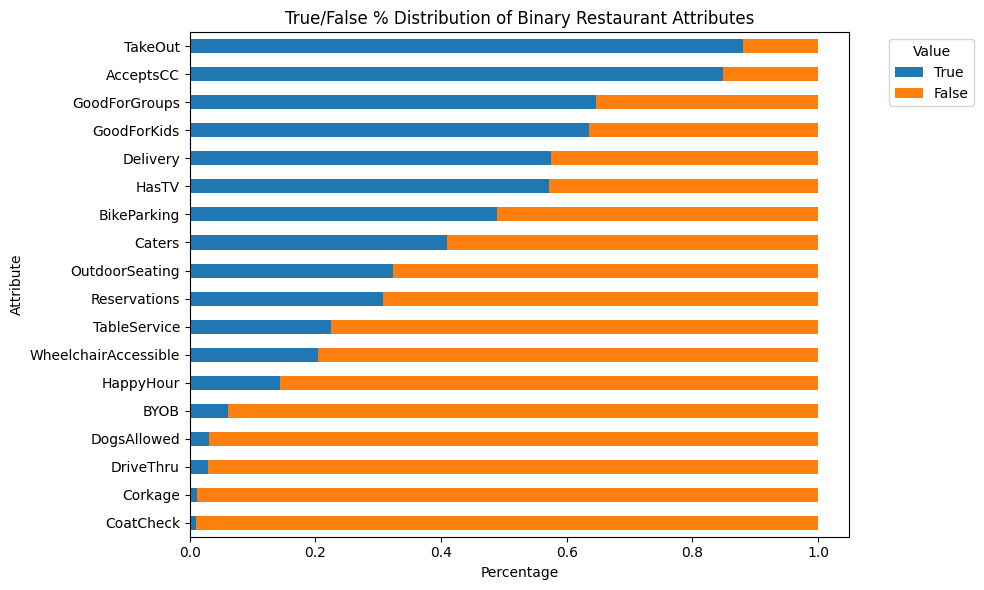

In [ ]:
binary_attributes_percentage = restaurants[binary_attributes].apply(
  lambda x: x.value_counts(normalize=True).sort_index(ascending=False)
)

sorted_order = binary_attributes_percentage.loc[True].sort_values().index
binary_attributes_percentage = binary_attributes_percentage.loc[:, sorted_order]

# Plotting the stacked bar chart
ax = binary_attributes_percentage.T.plot(kind='barh', stacked=True, figsize=(10, 6))

# Customize the chart
ax.set_ylabel('Attribute')
ax.set_xlabel('Percentage')
ax.set_title('True/False % Distribution of Binary Restaurant Attributes')
plt.legend(title='Value', labels=['True', 'False'],
           bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
multi_label_attributes = ['Ambience', 'CarParking', 'GoodForMeal', 'Music']

multi_label_attributes_counts = {}

for attr in multi_label_attributes:
  label_counter = Counter()
  _ = restaurants[attr].apply(lambda x: label_counter.update(x) if len(x) > 0
                              else label_counter.update(['null']))
  multi_label_attributes_counts[attr] = label_counter.most_common()

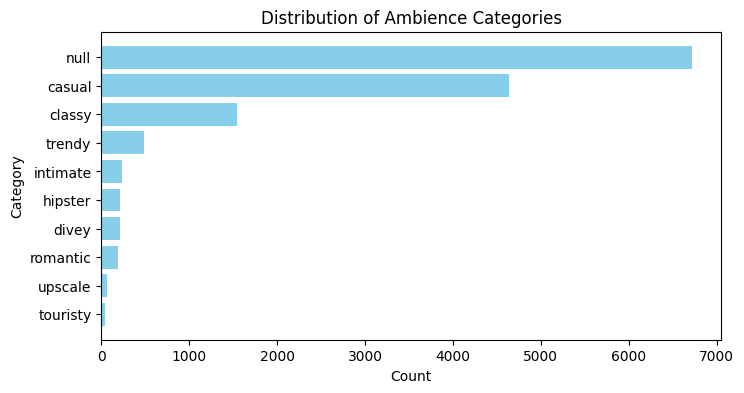

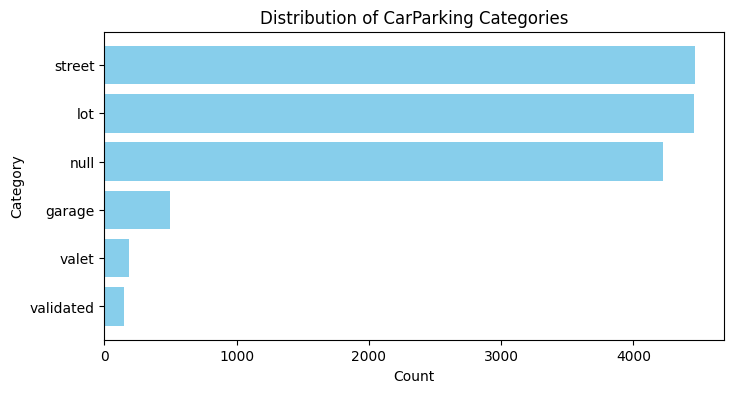

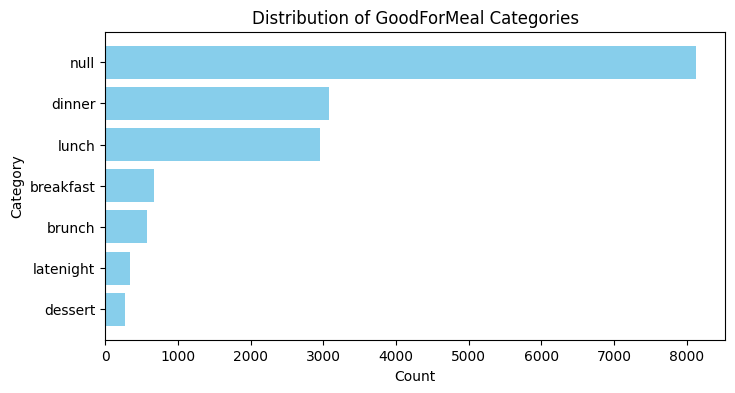

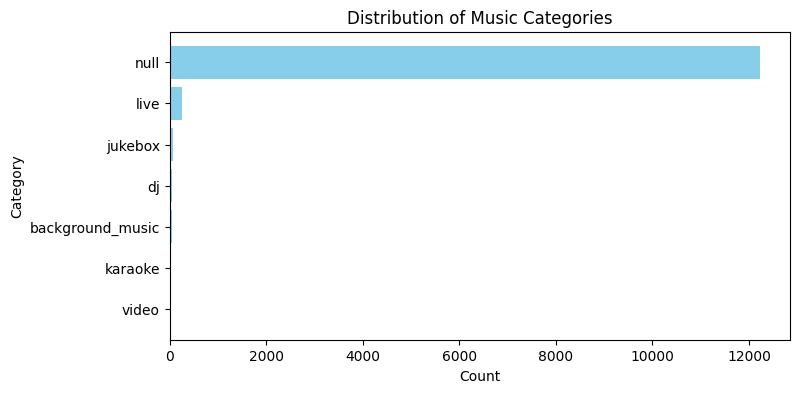

In [ ]:
for feature, counts in multi_label_attributes_counts.items():
  categories, values = zip(*counts)
  categories = categories[::-1]
  values = values[::-1]

  plt.figure(figsize=(8, 4))
  plt.barh(categories, values, color='skyblue')
  plt.title(f'Distribution of {feature} Categories')
  plt.xlabel('Count')
  plt.ylabel('Category')